#**Libraries**

**Period** | **Start** | **End**
-- | -- | --
`full` | `2021-01-04` | `2022-01-01`
`train/val` | `2021-01-04` | `2021-06-01`
`test` | `2021-06-01` | `2021-09-01`

In [22]:
import  os
import  numpy as np
import  pandas as pd
from    collections import Counter
import  pickle
from    datetime import datetime

In [23]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#**Load Data**

In [45]:
DATA_DIR = '/content/drive/MyDrive/NLX/ind-assignment/data'
FIG_DIR = '/content/drive/MyDrive/NLX/ind-assignment/figs'

In [46]:
gme = pd.read_csv(os.path.join(DATA_DIR, 'gme.csv'))
print(gme.shape)
gme.head()

(363, 8)


,date,open,high,low,close,volume,dividends,stock splits
0,2021-01-04 00:00:00-05:00,4.7500,4.7750,4.2875,4.3125,40090000.0,0.0,0.0
1,2021-01-05 00:00:00-05:00,4.3375,4.5200,4.3075,4.3425,19846000.0,0.0,0.0
2,2021-01-06 00:00:00-05:00,4.3350,4.7450,4.3325,4.5900,24224800.0,0.0,0.0
3,2021-01-07 00:00:00-05:00,4.6175,4.8625,4.5050,4.5200,24517200.0,0.0,0.0
4,2021-01-08 00:00:00-05:00,4.5450,4.5750,4.2700,4.4225,25928000.0,0.0,0.0


In [47]:
sentiment = pd.read_csv(os.path.join(DATA_DIR, 'reddit.csv'))
print(sentiment.shape)
sentiment.head()

(343, 22)


,date,compound_mean,compound_sum,compound_synth_pos_count,compound_synth_pos_mean,compound_synth_pos_sum,compound_synth_bin_count,compound_synth_bin_mean,compound_synth_bin_sum,neg_mean,...,neu_sum,pos_mean,pos_sum,log_count,log_compound_sum,log_compound_synth_pos_sum,log_compound_synth_bin_sum,log_neg_sum,log_neu_sum,log_pos_sum
0,2021-01-04 00:00:00-05:00,0.988900,1.9778,2,1.490159,2.980318,2,0.988900,1.9778,0.0000,...,0.268,0.86600,1.732,0.741937,0.731310,1.125033,0.731310,-2.302585,-0.999672,0.605408
1,2021-01-05 00:00:00-05:00,0.117950,0.2359,2,0.357836,0.715672,2,0.117950,0.2359,0.0575,...,1.629,0.12800,0.256,0.741937,-1.090942,-0.203743,-1.090942,-1.537117,0.547543,-1.032825
2,2021-01-06 00:00:00-05:00,0.388850,0.7777,2,0.645237,1.290474,2,0.388850,0.7777,0.0535,...,1.516,0.18850,0.377,0.741937,-0.130450,0.329645,-0.130450,-1.575036,0.479954,-0.740239
3,2021-01-10 00:00:00-05:00,0.966700,0.9667,1,1.715662,1.715662,1,0.966700,0.9667,0.0000,...,0.392,0.60800,0.608,0.095310,0.064570,0.596450,0.064570,-2.302585,-0.709277,-0.345311
4,2021-01-11 00:00:00-05:00,0.237925,0.9517,4,0.676453,2.705814,4,0.237925,0.9517,0.0000,...,3.423,0.14425,0.577,1.410987,0.050408,1.031694,0.050408,-2.302585,1.259313,-0.390084


#**Merge Data**

In [48]:
# Merge data
df = gme.merge(sentiment, on='date', how='left')

# Ffill missing values
df = df.fillna(method='ffill')

# Convert date to datetime
df['date'] = pd.to_datetime(df['date'])

# Set target var
df['target'] = df['close']

print(df.info())
print(df.shape)
print(df['date'].min())
print(df['date'].max())
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 363 entries, 0 to 362
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   date                        363 non-null    object 
 1   open                        363 non-null    float64
 2   high                        363 non-null    float64
 3   low                         363 non-null    float64
 4   close                       363 non-null    float64
 5   volume                      363 non-null    float64
 6   dividends                   363 non-null    float64
 7   stock splits                363 non-null    float64
 8   compound_mean               363 non-null    float64
 9   compound_sum                363 non-null    float64
 10  compound_synth_pos_count    363 non-null    float64
 11  compound_synth_pos_mean     363 non-null    float64
 12  compound_synth_pos_sum      363 non-null    float64
 13  compound_synth_bin_count    363 non

,date,open,high,low,close,volume,dividends,stock splits,compound_mean,compound_sum,...,pos_mean,pos_sum,log_count,log_compound_sum,log_compound_synth_pos_sum,log_compound_synth_bin_sum,log_neg_sum,log_neu_sum,log_pos_sum,target
0,2021-01-04 00:00:00-05:00,4.7500,4.7750,4.2875,4.3125,40090000.0,0.0,0.0,0.98890,1.9778,...,0.8660,1.732,0.741937,0.731310,1.125033,0.731310,-2.302585,-0.999672,0.605408,4.3125
1,2021-01-05 00:00:00-05:00,4.3375,4.5200,4.3075,4.3425,19846000.0,0.0,0.0,0.11795,0.2359,...,0.1280,0.256,0.741937,-1.090942,-0.203743,-1.090942,-1.537117,0.547543,-1.032825,4.3425
2,2021-01-06 00:00:00-05:00,4.3350,4.7450,4.3325,4.5900,24224800.0,0.0,0.0,0.38885,0.7777,...,0.1885,0.377,0.741937,-0.130450,0.329645,-0.130450,-1.575036,0.479954,-0.740239,4.5900
3,2021-01-07 00:00:00-05:00,4.6175,4.8625,4.5050,4.5200,24517200.0,0.0,0.0,0.38885,0.7777,...,0.1885,0.377,0.741937,-0.130450,0.329645,-0.130450,-1.575036,0.479954,-0.740239,4.5200
4,2021-01-08 00:00:00-05:00,4.5450,4.5750,4.2700,4.4225,25928000.0,0.0,0.0,0.38885,0.7777,...,0.1885,0.377,0.741937,-0.130450,0.329645,-0.130450,-1.575036,0.479954,-0.740239,4.4225


#**Visualize Data**

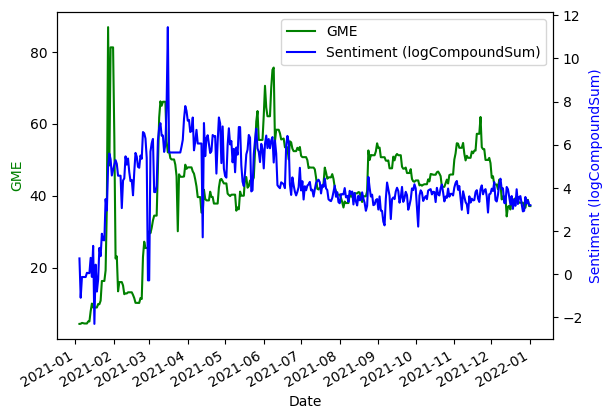

In [51]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime

# x = pd.to_datetime(df['date'])
x = df['date']
y1 = df['target']
y2 = df['log_compound_sum']

with open(os.path.join(DATA_DIR, 'date_x.pkl'), 'wb') as f:
    pickle.dump(x, f)

# Create a figure and a set of subplots
fig, ax1 = plt.subplots()

# Plot the first set of data with ax1 as the primary y-axis
ax1.plot(x, y1, 'g-', label='GME')  # 'g-' for green solid line
ax1.set_xlabel('Date')
ax1.set_ylabel('GME', color='g')  # Set the label and color of y-axis

ax1.xaxis.set_major_locator(mdates.MonthLocator())  # Locate by month
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))  # Format as Year-Month

# Create a second y-axis that shares the same x-axis
ax2 = ax1.twinx()
ax2.plot(x, y2, 'b-', label='Sentiment (logCompoundSum)')  # 'b-' for blue solid line
ax2.set_ylabel('Sentiment (logCompoundSum)', color='b')  # Set the label and color of the second y-axis

plt.gcf().autofmt_xdate()

# Handling legends when using twinx
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper right')

plt.savefig(os.path.join(FIG_DIR, 'gme-v-sentiment.png'))

plt.show()

In [ ]:
df.info()

#**Segment Periods**

In [ ]:
type(df['date'][0])

In [ ]:
import pytz

# Localize all time periods
TIMEZONE = pytz.timezone('America/New_York')
test_period_start   = TIMEZONE.localize(datetime(2021, 6, 1))
test_period_end     = TIMEZONE.localize(datetime(2021, 9, 1))

In [ ]:
df['period'] = 0

# Training Data-----------------------------------------------------------------
## Pre-Test
df.loc[(df['date'] < test_period_start), 'period'] = 1
## Pre- and Post-Test
df.loc[(df['date'] >= test_period_end), 'period'] = 2

# Test Data---------------------------------------------------------------------
df.loc[(df['date'] >= test_period_start) & (df['date'] < test_period_end), 'period'] = -1

df = df.set_index('date')

# Check there are no zeros
df['period'].value_counts()

#**Standardize Data**

In [ ]:
# These will be used to unstandardize data after making predictions

# Calculate train data mean for close price
close_train_mean = df.loc[df['period'] == 1, 'close'].mean(axis=0)

# Calculate train data std for close price
close_train_std  = df.loc[df['period'] == 1, 'close'].std(axis=0)

# Save mean, std as a tuple
close_train_mean_std = (close_train_mean, close_train_std)
with open(os.path.join(DATA_DIR, 'standardization.pkl'), 'wb') as f:
    pickle.dump(close_train_mean_std, f)

In [ ]:
# Get non-period cols
non_pd_vars = list(df.columns.difference(['period']))

# Calculate train data mean
train_mean = df.loc[df['period'] == 1, non_pd_vars].mean(axis=0)

# Calculate train data std
train_std = df.loc[df['period'] == 1, non_pd_vars].std(axis=0)

# Standardize data
df_std = (df[non_pd_vars] - train_mean) / (train_std + 1e-6)

# Add back the period column
df_std = pd.concat([df[['period']], df_std], axis=1)

df_std.head()

In [ ]:
df_std.columns

In [ ]:
df_std = df_std.reset_index()

#**Process Data for PyTorch**

In [ ]:
LOOKBACK = 21

x_cols_sent = [
    'open', 'high', 'low', 'close', 'volume', 'dividends', 'stock splits',
    'neg_mean', 'neu_mean', 'pos_mean', 'compound_mean',
    'neg_sum', 'neu_sum', 'pos_sum', 'compound_sum',
    'log_neg_sum', 'log_neu_sum', 'log_pos_sum', 'log_compound_sum',
]
x_cols_sent_short = [
    'open', 'high', 'low', 'close', 'volume', 'dividends', 'stock splits',
    'compound_mean', 'compound_sum', 'log_compound_sum',
]
x_cols_nosent = [
    'open', 'high', 'low', 'close', 'volume', 'dividends', 'stock splits',
]
target_col = [
    'target'
]
x_col_synth_pos = [
    'open', 'high', 'low', 'close', 'volume', 'dividends', 'stock splits',
    'compound_synth_pos_mean', 'compound_synth_pos_sum', 'log_compound_synth_pos_sum',
]
x_col_synth_bin = [
    'open', 'high', 'low', 'close', 'volume', 'dividends', 'stock splits',
    'compound_synth_bin_mean', 'compound_synth_bin_sum', 'log_compound_synth_bin_sum',
]

periods = []
all_instances = []
pre_test_instances = []
test_instances = []
post_test_instances = []

for i in range(len(df_std) - LOOKBACK):

    period                  = np.min(df_std.loc[i:i+LOOKBACK, 'period'])

    feat_sentiment_long     = np.array(df_std.loc[i  :i+LOOKBACK-1, x_cols_sent])
    feat_sentiment_short    = np.array(df_std.loc[i  :i+LOOKBACK-1, x_cols_sent_short])
    feat_no_sentiment       = np.array(df_std.loc[i  :i+LOOKBACK-1, x_cols_nosent])
    feat_synth_pos          = np.array(df_std.loc[i  :i+LOOKBACK-1, x_col_synth_pos])
    feat_synth_bin          = np.array(df_std.loc[i  :i+LOOKBACK-1, x_col_synth_bin])

    target                  = np.array(df_std.loc[i+1:i+LOOKBACK  , target_col])

    data_tup = (target,
                feat_sentiment_long, feat_sentiment_short,
                feat_no_sentiment,
                feat_synth_pos, feat_synth_bin)

    all_instances.append(data_tup)
    periods.append(period)

    if period == -1:
        test_instances.append(data_tup)
    elif period == 1:
        pre_test_instances.append(data_tup)
    elif period == 2:
        post_test_instances.append(data_tup)
    else:
        print(f"Something went wrong. {period} is not a valid period")

print(all_instances[0][-1].shape)
print(len(all_instances))
print(Counter(periods))
print(len(pre_test_instances), len(post_test_instances), len(test_instances))

In [ ]:
data = {
    'all_instances': all_instances,
    'pre_test_instances': pre_test_instances,
    'post_test_instances': post_test_instances,
    'test_instances': test_instances,
}

In [ ]:
# Check implementation
close_idx = 3
for day_idx in range(10):
    print(f'*** Day {day_idx} ***')
    print(f"Target (close t+1): {data['pre_test_instances'][day_idx][0][-1][0]:.2f}")
    print(f"Close Price (t): {data['pre_test_instances'][day_idx][1][-1][close_idx]:.2f}")
    print()

In [ ]:
with open(os.path.join(DATA_DIR, 'data.pkl'), 'wb') as f:
    pickle.dump(data, f)